# Problem statement:
This dataset has 21 columns and 3333 rows. Our task is to analyze the dataset and predict the Churn Status of customer as 1 or 0 by developing a supervised machine learning model.

In [32]:
# Import all the required liabrary

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,r2_score
from sklearn.feature_selection import RFE

In [33]:
#Load HR Data Set
df = pd.read_csv("datasets.csv")
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# Analyzing the data:
Let’s start analyzing the data provided. We need to know the number of columns, rows, null objects, etc. So, let’s open the data and start counting the columns, get the row count, go through each row to find out any special characters or null values in it, find out the data type of each column provided.



In [34]:
#check the shape of data
df.shape

(3333, 21)

In [35]:
#Check if any missing value present in data
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [36]:
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [37]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [38]:
categorical_col =[]
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique())<=50:
        categorical_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print("=================================")
        

international plan : ['no' 'yes']
voice mail plan : ['yes' 'no']


In [39]:
df['churn']=df.churn.astype('category').cat.codes

# Data Visualization:
Here we would try to find out a relation between each column of the final numerical dataset and the target attribute income. This can be achieved by creating a Bar graph between income and each of the other columns.

In [40]:
df.churn.value_counts()

0    2850
1     483
Name: churn, dtype: int64

account length               AxesSubplot(0.125,0.749828;0.168478x0.130172)
area code                 AxesSubplot(0.327174,0.749828;0.168478x0.130172)
number vmail messages     AxesSubplot(0.529348,0.749828;0.168478x0.130172)
total day minutes         AxesSubplot(0.731522,0.749828;0.168478x0.130172)
total day calls              AxesSubplot(0.125,0.593621;0.168478x0.130172)
total day charge          AxesSubplot(0.327174,0.593621;0.168478x0.130172)
total eve minutes         AxesSubplot(0.529348,0.593621;0.168478x0.130172)
total eve calls           AxesSubplot(0.731522,0.593621;0.168478x0.130172)
total eve charge             AxesSubplot(0.125,0.437414;0.168478x0.130172)
total night minutes       AxesSubplot(0.327174,0.437414;0.168478x0.130172)
total night calls         AxesSubplot(0.529348,0.437414;0.168478x0.130172)
total night charge        AxesSubplot(0.731522,0.437414;0.168478x0.130172)
total intl minutes           AxesSubplot(0.125,0.281207;0.168478x0.130172)
total intl calls         

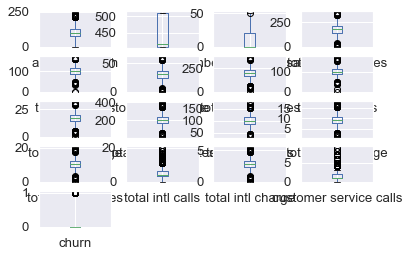

In [41]:
#check outliers
df.plot(kind='box',subplots=True,layout=(5,4))

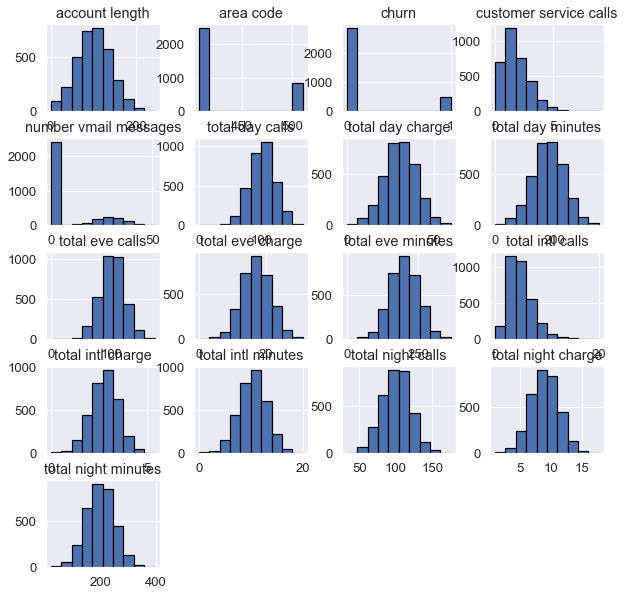

In [42]:
# Visulazing the distibution of the data for every feature
df.hist(edgecolor='black', linewidth=1.2, figsize=(10, 10));

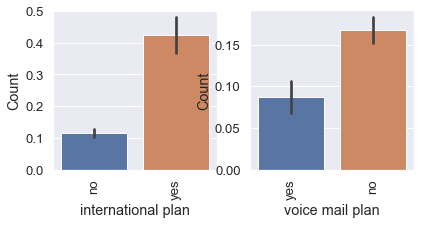

In [43]:
# Plotting how every feature correlate with the "target"
sns.set(font_scale=1.2)
plt.figure(figsize=(10, 10))

for i, column in enumerate(categorical_col, 1):
    plt.subplot(3, 3, i)
    g = sns.barplot(x=f"{column}", y='churn', data=df)
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    plt.ylabel('Count')
    plt.xlabel(f'{column}')

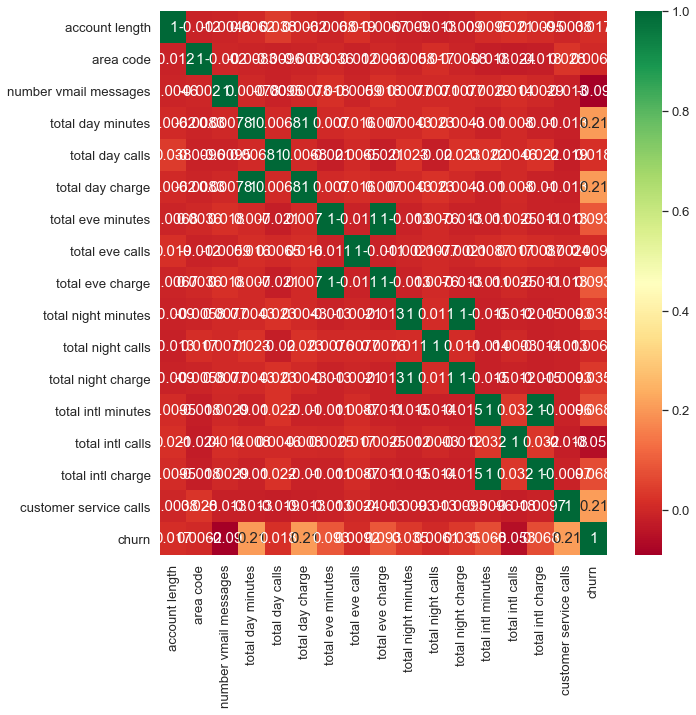

In [44]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

# Feature Engineering:
Machine Learning model requires input data in numerical notations to extract patterns from it and make predictions. But, not all the data provided in our source dataset is numerical. the data provided in object column is Categorical data. we need to convert these into numerical notations. Here data is nothing but a feature that our model uses as an input. So, we perform Feature Engineering on our data to create meaningful numerical data out of the source dataset.

In [45]:
#Check if any missing value present in data
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [46]:
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        int8
dtype: object

In [47]:
std_scale = StandardScaler()
std_scale

StandardScaler(copy=True, with_mean=True, with_std=True)

In [48]:
column = ['account length','area code','number vmail messages','total day calls','total eve calls',
          'total night calls','total intl calls','customer service calls']

for i in column:
    df[column] = std_scale.fit_transform(df[column])


In [49]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,0.676489,-0.523603,382-4657,no,yes,1.234883,265.1,0.476643,45.07,...,-0.055940,16.78,244.7,-0.465494,11.01,10.0,-0.601195,2.70,-0.427932,0
1,OH,0.149065,-0.523603,371-7191,no,yes,1.307948,161.6,1.124503,27.47,...,0.144867,16.62,254.4,0.147825,11.45,13.7,-0.601195,3.70,-0.427932,0
2,NJ,0.902529,-0.523603,358-1921,no,no,-0.591760,243.4,0.675985,41.38,...,0.496279,10.30,162.6,0.198935,7.32,12.2,0.211534,3.29,-1.188218,0
3,OH,-0.428590,-0.688834,375-9999,yes,no,-0.591760,299.4,-1.466936,50.90,...,-0.608159,5.26,196.9,-0.567714,8.86,6.6,1.024263,1.78,0.332354,0
4,OK,-0.654629,-0.523603,330-6626,yes,no,-0.591760,166.7,0.626149,28.34,...,1.098699,12.61,186.9,1.067803,8.41,10.1,-0.601195,2.73,1.092641,0


In [50]:
df['state'].unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [51]:
df['phone number'].unique()

array(['382-4657', '371-7191', '358-1921', ..., '328-8230', '364-6381',
       '400-4344'], dtype=object)

In [52]:
df.drop(['state','phone number'],axis=1,inplace=True)

In [53]:
dummies = pd.get_dummies(df[['international plan','voice mail plan']])
dummies.head()

,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
0,1,0,0,1
1,1,0,0,1
2,1,0,1,0
3,0,1,1,0
4,0,1,1,0


In [54]:
df = pd.concat([df,dummies],axis=1)

In [55]:
df.drop(['international plan','voice mail plan'],axis=1,inplace=True)

In [56]:
df.head()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,...,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
0,0.676489,-0.523603,1.234883,265.1,0.476643,45.07,197.4,-0.055940,16.78,244.7,...,11.01,10.0,-0.601195,2.70,-0.427932,0,1,0,0,1
1,0.149065,-0.523603,1.307948,161.6,1.124503,27.47,195.5,0.144867,16.62,254.4,...,11.45,13.7,-0.601195,3.70,-0.427932,0,1,0,0,1
2,0.902529,-0.523603,-0.591760,243.4,0.675985,41.38,121.2,0.496279,10.30,162.6,...,7.32,12.2,0.211534,3.29,-1.188218,0,1,0,1,0
3,-0.428590,-0.688834,-0.591760,299.4,-1.466936,50.90,61.9,-0.608159,5.26,196.9,...,8.86,6.6,1.024263,1.78,0.332354,0,0,1,1,0
4,-0.654629,-0.523603,-0.591760,166.7,0.626149,28.34,148.3,1.098699,12.61,186.9,...,8.41,10.1,-0.601195,2.73,1.092641,0,0,1,1,0


# Model Selection:
There are around 60+ predictive modeling algorithms that are available to choose from. We must have a good understanding of our data and the desired solution we are looking for, to narrow down our model selection. Here our goal is to predict the churn status by developing a supervised machine learning model and we want to identify a relation between our output and remaining independent features . This scenario is a classic example of classification.

We are provided with 3333 rows of the labeled dataset tagged with the output column “churn” to train our model. Whenever the dataset is labeled and output feature is known, we opt for the Supervised Learning Machine Learning technique. So, our use-case is a Supervised Learning plus Classification problem. Based on these criteria we can narrow down our choice of models to a few:

Logistic Regression

SVC()

DecisionTreeRegressor()

KNeighborsClassifier


# Identifying features:
Here we are dividing our data into a dependent feature that is object as y and independent features as x.

In [57]:
x = df.drop('churn', axis=1)
y = df.churn

# Splitting Data:
we split our data into a test set and train set using train_test_split() which helps to better train the model and test its performance. test_size=0.15 creates a test data set with 10% of the data we have and the remaining 90% percent will be our training set to train our model. This split function returns us a pair of the train set (x_train,y_train) and a pair of the test set (x_test,y_test).

In [58]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=44)

In [59]:
model = [LogisticRegression(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(n_neighbors=7)]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm = m.predict(x_test)
    print('accuaracy score of',accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


accuaracy score of 0.8502994011976048
[[277  15]
 [ 35   7]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       292
           1       0.32      0.17      0.22        42

    accuracy                           0.85       334
   macro avg       0.60      0.56      0.57       334
weighted avg       0.82      0.85      0.83       334



accuaracy score of 0.874251497005988
[[292   0]
 [ 42   0]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       292
           1       0.00      0.00      0.00        42

    accuracy                           0.87       334
   macro avg       0.44      0.50      0.47       334
weighted avg       0.76      0.87      0.82       334



accuaracy score of 0.9101796407185628
[[275  17]
 [ 13  29]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       292
           1       0.63      0.69      0.66        

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


accuaracy score of 0.8862275449101796
[[287   5]
 [ 33   9]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       292
           1       0.64      0.21      0.32        42

    accuracy                           0.89       334
   macro avg       0.77      0.60      0.63       334
weighted avg       0.86      0.89      0.86       334





# we can observe that Decision Tree Classifier algorithem worked very well.
Accuracy score of both algorithems are as given:-

Accuracy score of LogisticRegression() is 85%

Accuracy score of SVC() is 87%

Accuracy score of DecisionTreeClassifier() is 91%

Accuracy score of KNeighborsClassifier is 88%

Hence we can say that out all algorithems Decision Tree Classifier is best for this problem till now however we will use cross validation to select best model.

# Model Validation¶

In [60]:
clf = DecisionTreeClassifier()

scores = cross_val_score(clf,x,y,cv=5,scoring='accuracy')
scores

array([0.91304348, 0.91154423, 0.93553223, 0.92642643, 0.90990991])

In [61]:
x_train.shape

(2999, 20)

# Hyperparameter Tuning Using Grid Search Cross-Validation
A common use of cross-validation is for tuning hyperparameters of a model. The most common technique is what is called grid search cross-validation.

In [62]:

#specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 19))}]


#grid search
#specify model
lm =DecisionTreeClassifier()
lm.fit(x_train, y_train)
rfe = RFE(lm)             

#call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe,param_grid = hyper_params,scoring= 'accuracy',cv = 5,verbose = 1,return_train_score=True)      

# fit the model
model_cv.fit(x_train, y_train)  

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   36.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RFE(estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                            class_weight=None,
                                                            criterion='gini',
                                                            max_depth=None,
                                                            max_features=None,
                                                            max_leaf_nodes=None,
                                                            min_impurity_decrease=0.0,
                                                            min_impurity_split=None,
                                                            min_samples_leaf=1,
                                                            min_samples_split=2,
                                                            min_weight_fraction_leaf=0.0,
                                                            presort='depr

In [63]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.636869,0.068484,0.001789,0.000396,1,{'n_features_to_select': 1},0.823333,0.823333,0.803333,0.813333,...,0.815271,0.007501,17,0.934556,0.930805,0.933306,0.932472,0.932917,0.932811,0.00122
1,0.549532,0.066555,0.002195,0.000399,2,{'n_features_to_select': 2},0.796667,0.793333,0.803333,0.805000,...,0.798932,0.004460,18,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.00000
2,0.563299,0.027347,0.001796,0.000400,3,{'n_features_to_select': 3},0.855000,0.816667,0.815000,0.805000,...,0.818600,0.019103,16,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.00000
3,0.505841,0.018009,0.001797,0.000397,4,{'n_features_to_select': 4},0.860000,0.820000,0.871667,0.843333,...,0.849284,0.017397,15,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.00000
4,0.523605,0.073824,0.001797,0.000398,5,{'n_features_to_select': 5},0.820000,0.865000,0.878333,0.851667,...,0.856289,0.020016,14,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.00000
5,0.475528,0.018788,0.001596,0.000489,6,{'n_features_to_select': 6},0.866667,0.853333,0.858333,0.851667,...,0.858621,0.005679,13,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.00000
6,0.491492,0.053919,0.001796,0.000399,7,{'n_features_to_select': 7},0.911667,0.836667,0.865000,0.856667,...,0.868290,0.024648,12,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.00000
7,0.452453,0.014609,0.001598,0.000488,8,{'n_features_to_select': 8},0.908333,0.901667,0.855000,0.880000,...,0.887631,0.018863,11,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.00000
8,0.406712,0.021116,0.001794,0.000400,9,{'n_features_to_select': 9},0.910000,0.901667,0.925000,0.863333,...,0.905309,0.022960,10,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.00000
9,0.430044,0.036138,0.001797,0.000398,10,{'n_features_to_select': 10},0.913333,0.893333,0.930000,0.921667,...,0.915306,0.012259,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.00000


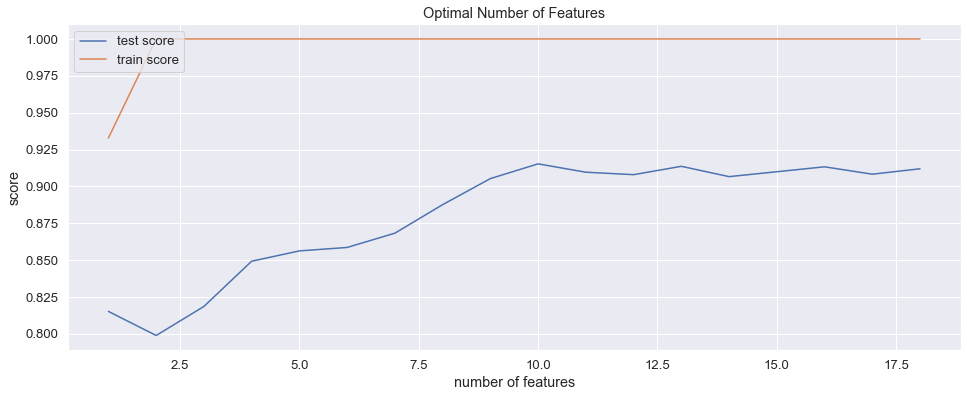

In [64]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('score')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

# Now we can choose the optimal value of number of features and build a final model.

In [66]:
# final model
n_features_optimal = 10

lm =  DecisionTreeClassifier()
lm.fit(x_train, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(x_train, y_train)

# predict prices of X_test
y_pred = rfe.predict(x_test)
score = accuracy_score(y_test,y_pred)
print(score)

0.9251497005988024


# Save the model using Pickle¶

In [67]:
# Save the model using pickle
import pickle

filename = "pickleDTCfile.pkl"
pickle.dump(rfe, open(filename, 'wb'))


# Conclusion:
we achieved highest accuracy score of 92% by using Decision Tree Classifier which is good for any machine learning prediction model particularly for a classification problem. Finally! we successfully created a Classification Machine Learning prediction model using Python and its powerful libraries which predicts the Customer Churn Status.